# **Apache PySpark**

## Install Spark, Pyspark

In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [ ]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
!pip install pyspark==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317123 sha256=edfd093b1c96d8455fa55728664403bdbe063e5a31a7dba0599f625b2e86e0ad
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


## Downloading and preprocessing

In [ ]:
!ls


sample_data  spark-3.0.0-bin-hadoop3.2	spark-3.0.0-bin-hadoop3.2.tgz


In [ ]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2023-12-14 01:08:04--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [       <=>          ]   1.75G  2.38MB/s    in 11m 24s 

2023-12-14 01:19:29 (2.62 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1878534482]



In [ ]:
!ls


'rows.csv?accessType=DOWNLOAD'	 spark-3.0.0-bin-hadoop3.2
 sample_data			 spark-3.0.0-bin-hadoop3.2.tgz


In [ ]:
#change file name
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

mv: cannot stat 'rows.csv?accessType=DOWNLOAD': No such file or directory
total 2053716
-rw-r--r--  1 root root 1878534482 Dec 13 11:52 reported-crimes.csv
drwxr-xr-x  1 root root       4096 Dec 12 14:21 sample_data
drwxr-xr-x 13 1000 1000       4096 Jun  6  2020 spark-3.0.0-bin-hadoop3.2
-rw-r--r--  1 root root  224453229 Jun  6  2020 spark-3.0.0-bin-hadoop3.2.tgz


In [68]:
#read CSV file to DataFrame
#change format column'Date' to Timestamp
#filtering data by date
from pyspark.sql.functions import to_timestamp,col,lit
data = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
data.show(10)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11037294|   JA371270|2015-03-18 12:00:00|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| fal

## Schemas

In [118]:
#DataFrames current schemas
data.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
from pyspark.sql.types import StructType, StructField, StructType, TimestampType, StringType, BooleanType,DoubleType, IntegerType

In [69]:
data.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
#manual
schema StructType ([
    StructField('ID', StringType, True),
    StructField('Case Number',StringType, True),
    StructField( 'Date', TimestampType, True),
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location'
])

SyntaxError: ignored

In [ ]:
#pintasan
labels = [
    ('ID', StringType()),
    ('Case Number', StringType()),
    ('Date', TimestampType()),
    ('Block', StringType()),
    ('IUCR', StringType()),
    ('Primary Type', StringType()),
    ('Description', StringType()),
    ('Location Description',StringType()),
    ('Arrest',StringType()),
    ('Domestic',BooleanType()),
    ('Beat', StringType()),
    ('District', StringType()),
    ('Ward', StringType()),
    ('Community Area', StringType()),
    ('FBI Code', StringType()),
    ('X Coordinate', StringType()),
    ('Y Coordinate', StringType()),
    ('Year', IntegerType()),
    ('Updated On', StringType()),
    ('Latitude', DoubleType()),
    ('Longitude',DoubleType()),
    ('Location', StringType())
]

In [ ]:
schema = StructType([StructField (x[0],x[1],True)for x in labels ])
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,StringType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,StringType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [74]:
# data = spark.read.csv('reported-crimes.csv', schema=schema)
# data.printSchema()

In [76]:
data.show(10)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11037294|   JA371270|2015-03-18 12:00:00|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| fal

## Columns

In [77]:
#display 5 first rows of the columns casenumber
data.select('Case Number').show(10)

+-----------+
|Case Number|
+-----------+
|   JA371270|
|   JC212333|
|   JC212935|
|   JC213529|
|   JC212959|
|   JC212685|
|   JC212744|
|   JC213044|
|   HL474854|
|    G553545|
+-----------+
only showing top 10 rows



In [79]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("SkippingHeader").getOrCreate()

# Read the CSV file and skip the header
data = spark.read.csv('reported-crimes.csv', header=True)

# Display the data
data.show()


+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK|

In [119]:
#display 15 first rows of the columns casenumber
spark = SparkSession.builder.appName("SkippingHeader").getOrCreate()


# Read the CSV file and skip the header
data = spark.read.csv('reported-crimes.csv', header=True)
data.select('Case Number').show(15)

+-----------+
|Case Number|
+-----------+
|   JA371270|
|   JC213749|
|   JC212333|
|   JC211511|
|   JC212935|
|   JC213529|
|   JC212959|
|   JC212685|
|   JC212744|
|   JC213044|
|   JC212803|
|   JD226426|
|   JD209965|
|   JD282112|
|   JD381597|
+-----------+
only showing top 15 rows



In [ ]:
data.select('Case Number').limit(15).show()


+-----------+
|Case Number|
+-----------+
|   JA371270|
|   JC213749|
|   JC212333|
|   JC211511|
|   JC212935|
|   JC213529|
|   JC212959|
|   JC212685|
|   JC212744|
|   JC213044|
|   JC212803|
|   JD226426|
|   JD209965|
|   JD282112|
|   JD381597|
+-----------+



In [ ]:
data.select('Case Number', 'Date').show(4)

+-----------+--------------------+
|Case Number|                Date|
+-----------+--------------------+
|   JA371270|03/18/2015 12:00:...|
|   JC213749|12/20/2018 03:00:...|
|   JC212333|05/01/2016 12:25:...|
|   JC211511|12/20/2018 04:00:...|
+-----------+--------------------+
only showing top 4 rows



In [ ]:
#add column with name one, with entries all 1 s

from pyspark.sql.functions import lit

data.withColumn('One', lit(1)).show(5)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|One|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            3

In [ ]:
#remove the column One

data = data.drop('One')
data.show(5)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11| 

## Rows

In [ ]:
#addreported crime for additional day, 12-Jun3-2019, to dataset

one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

3

In [ ]:
data.union(one_day).orderBy('Date', ascending=False).show(5)

+--------+-----------+--------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11540042|   JB559262| 2018-11-12 00:00:00|010XX N DEARBORN ST|1140|DECEPTIVE PRACTICE|        EMBEZZLEMENT|   CONVENIENCE STORE|  tr

In [ ]:
#top number of reported crimes by primary type, in descending order of occurence

data.groupBy('Primary Type').count().show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  56978|
|CRIMINAL SEXUAL A...|   7889|
|            STALKING|   5136|
|PUBLIC PEACE VIOL...|  52895|
|           OBSCENITY|    841|
|NON-CRIMINAL (SUB...|      9|
|               ARSON|  13588|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14630|
|   CRIMINAL TRESPASS| 217232|
|             ASSAULT| 522078|
|      NON - CRIMINAL|     38|
|LIQUOR LAW VIOLATION|  15014|
| MOTOR VEHICLE THEFT| 393821|
|               THEFT|1679602|
|             BATTERY|1451958|
|             ROBBERY| 299902|
|            HOMICIDE|  12984|
|           RITUALISM|     24|
|    PUBLIC INDECENCY|    197|
+--------------------+-------+
only showing top 20 rows



In [ ]:
data.groupBy('Primary Type').count().orderBy('count',ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1679602|
|            BATTERY|1451958|
|    CRIMINAL DAMAGE| 906808|
|          NARCOTICS| 750889|
|            ASSAULT| 522078|
|      OTHER OFFENSE| 493565|
|           BURGLARY| 429139|
|MOTOR VEHICLE THEFT| 393821|
| DECEPTIVE PRACTICE| 356224|
|            ROBBERY| 299902|
+-------------------+-------+
only showing top 10 rows



In [ ]:
#what percentage of reported crimes result in an arrest?

data.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [ ]:
#arrest is stringtype

data.filter(col('Arrest') == 'true').count() / data.select('Arrest').count()

0.25832687950859

In [ ]:
#top 3 location for reported crimes

data.groupBy('Location Description').count().show()

+--------------------+------+
|Location Description| count|
+--------------------+------+
|   RAILROAD PROPERTY|    15|
|SCHOOL - PRIVATE ...|   934|
|AIRPORT TERMINAL ...|  2434|
|VEHICLE - COMMERCIAL|   771|
|EXPRESSWAY EMBANK...|     1|
|POLICE FACILITY/V...| 18566|
|RESIDENCE - YARD ...| 10892|
|               MOTEL|     7|
|CHA PARKING LOT /...|  1674|
|            SIDEWALK|738063|
|AIRPORT TERMINAL ...|   126|
|PUBLIC GRAMMAR SC...|     2|
|OTHER RAILROAD PR...|   426|
|CTA GARAGE / OTHE...| 10277|
|            CAR WASH|  3424|
|   TRUCKING TERMINAL|     1|
|    AIRPORT/AIRCRAFT| 16280|
|            HOSPITAL|    13|
|MEDICAL/DENTAL OF...|  7430|
|    FEDERAL BUILDING|   987|
+--------------------+------+
only showing top 20 rows



In [ ]:
data.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|2077489|
|           RESIDENCE|1326332|
|           APARTMENT| 910237|
+--------------------+-------+
only showing top 3 rows



## Functions

In [ ]:
from pyspark.sql import functions

In [ ]:
print(dir(functions))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_column_from_literal', '_create_column_from_name', '_create_function', '_create_function_over_column', '_create_udf', '_create_window_function', '_functions', '_functions_1_4_over_column', '_functions_1_6_over_column', '_functions_2_1_over_column', '_functions_2_4', '_functions_deprecated', '_functions_over_column', '_lit_doc', '_message', '_options_to_str', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max',

In [ ]:
from pyspark.sql.functions import lower, upper, substring

In [ ]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [ ]:
data.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
|      other offense|      OTHER OFFENSE|                         OTHE|
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [ ]:
#showing the oldest date and the most recend date

from pyspark.sql.functions import min,max

In [ ]:
data.select(min(col('Date')), max(col('Date'))).show(1)

+--------------------+--------------------+
|           min(Date)|           max(Date)|
+--------------------+--------------------+
|01/01/2001 01:00:...|12/31/2022 12:59:...|
+--------------------+--------------------+



In [ ]:
from pyspark.sql.functions import col, date_add, date_sub

In [ ]:
help(date_add)


Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    
    .. versionadded:: 1.5



In [ ]:
#what is 3 days earlier than the oldesr date and 3 days later than the most recent date

data.select(date_sub(min(col('Date')),3), date_add(max(col('Date')),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|                  null|                  null|
+----------------------+----------------------+



## Date

In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [ ]:
data.select(to_date(lit('2019-12-25')),to_date(lit('2019-25-15'))).show(1)

+---------------------+---------------------+
|to_date('2019-12-25')|to_date('2019-25-15')|
+---------------------+---------------------+
|           2019-12-25|                 null|
+---------------------+---------------------+
only showing top 1 row



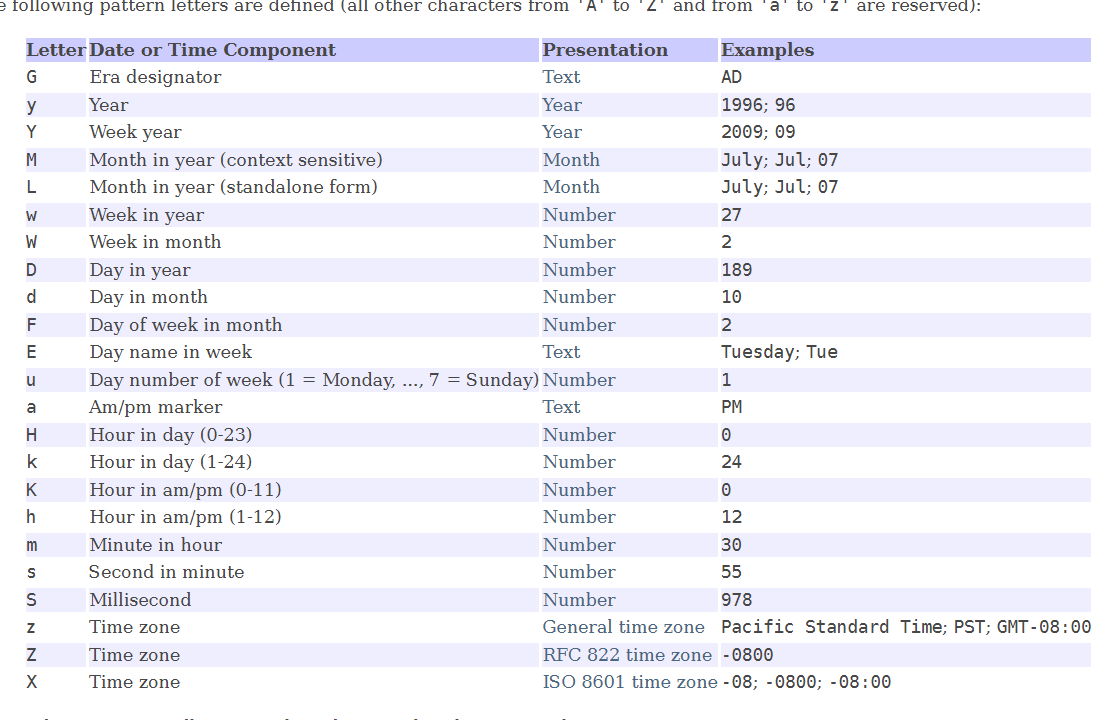

2019-12-25 13:30:00

In [ ]:
data = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
data.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [ ]:
data.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2019-12-25|                             2019-12-25 13:30:00|
+-------------------------------------------+------------------------------------------------+



25/Dec/2019 13:30:00

In [ ]:
data = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
data.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [ ]:
data.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+--------------------------------------------+-------------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2019-12-25|                              2019-12-25 13:30:00|
+--------------------------------------------+-------------------------------------------------+



12/25/2019 01:30:00 PM

In [60]:
data = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])
# data.show(1) kepotong
data.show(1, truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [ ]:
# data.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa')).show(1)

In [ ]:

spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = spark.createDataFrame([('Fri May 24 00:00:00 BST 2019',)], ['mydate'])
df = df.select('mydate',
                to_timestamp(df.mydate.substr(5, 28), 'MMM dd HH:mm:ss zzz yyyy').alias('datetime'),
                to_timestamp(df.mydate, 'EEE MMM dd HH:mm:ss zzz yyyy').alias('LEGACYdatetime')
               ).show(1, False)

df = spark.createDataFrame([('Fri May 24 00:00:00 GMT 2019',)], ['mydate'])
df = df.select('mydate',
                to_timestamp(df.mydate.substr(5, 28), 'MMM dd HH:mm:ss zzz yyyy').alias('datetime'),
                to_timestamp(df.mydate, 'EEE MMM dd HH:mm:ss zzz yyyy').alias('LEGACYdatetime')
               ).show(1, False)

spark.sql("set spark.sql.legacy.timeParserPolicy=CORRECTED")
df = spark.createDataFrame([('Fri May 24 00:00:00 BST 2019',)], ['mydate'])
df = df.select('mydate',
                to_timestamp(df.mydate.substr(5, 28), 'MMM dd HH:mm:ss zzz yyyy').alias('datetime')
               ).show(1, False)

df = spark.createDataFrame([('Fri May 24 00:00:00 GMT 2019',)], ['mydate'])
df = df.select('mydate',
                to_timestamp(df.mydate.substr(5, 28), 'MMM dd HH:mm:ss zzz yyyy').alias('datetime')
               ).show(1, False)

+----------------------------+-------------------+-------------------+
|mydate                      |datetime           |LEGACYdatetime     |
+----------------------------+-------------------+-------------------+
|Fri May 24 00:00:00 BST 2019|2019-05-23 23:00:00|2019-05-23 23:00:00|
+----------------------------+-------------------+-------------------+

+----------------------------+-------------------+-------------------+
|mydate                      |datetime           |LEGACYdatetime     |
+----------------------------+-------------------+-------------------+
|Fri May 24 00:00:00 GMT 2019|2019-05-24 00:00:00|2019-05-24 00:00:00|
+----------------------------+-------------------+-------------------+

+----------------------------+-------------------+
|mydate                      |datetime           |
+----------------------------+-------------------+
|Fri May 24 00:00:00 BST 2019|2019-05-23 13:00:00|
+----------------------------+-------------------+

+----------------------------+--

In [ ]:
nrc = spark.read.csv('reported-crimes.csv', header=True)
nrc.show(5,truncate=False)

+--------+-----------+----------------------+--------------------+----+------------------+---------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|ID      |Case Number|Date                  |Block               |IUCR|Primary Type      |Description                            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude|Longitude|Location|
+--------+-----------+----------------------+--------------------+----+------------------+---------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|11037294|JA371270   |03/18/2015 12:00:00 PM|0000X W WACKER DR   |1153|DECEPTIVE PRACTICE|FINANCIAL IDENTITY THEFT OVER $

## Joins

In the 'Reported Crimes' dataset, the 'District' column contains only numbers without district names. I will download the 'Police Stations' dataset and perform a join operation between these two dataframes

In [58]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -1

--2023-12-14 03:46:42--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2023-12-14 03:46:42 (1.40 GB/s) - ‘police-station.csv’ saved [5699]

police-station.csv
reported-crimes.csv
sample_data
spark-3.0.0-bin-hadoop3.2
spark-3.0.0-bin-hadoop3.2.tgz


In [62]:
data2 = spark.read.csv('police-station.csv', header=True)
data2.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

data(reported crimes csv) only has district number. add the district name by joining with police dataset(data2)

In [81]:
data.cache()
data.count()

7955231

In [82]:
data2.select(col('DISTRICT')).distinct().show(20)

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
+------------+
only showing top 20 rows



In [83]:
data.select('District').distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|      16|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     003|
|     005|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



Okay, the problem has been detected. Two datasets reference the same district numbers, but there is a difference: Data 1 contains the zero, whereas Data 2 does not

In [84]:
from pyspark.sql.functions import lpad

In [85]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



In [86]:
data2.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [87]:
data2 = data2.withColumn('Format_district', lpad(col('DISTRICT'),3,'0'))
data2.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [88]:
data.join(data2, data.District == data2.Format_district, 'left_outer').show()

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_dist

In [89]:
data2.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [92]:
data.join(data2, data.District == data2.Format_district, 'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district').show()

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11|2015|08/01/2017 03:52:...|       1|       Central|
|11646293|   JC213749|12/20/2018 03:00:.

## Find the :
1. most frequently reported noncriminal activity
2. find the day of the week with the most reported crime

In [93]:
data.cache()
data.count()

7955231

In [94]:
data.show(10)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11| 

In [95]:
#1
data.select(col('Primary Type')).distinct().count()

36

In [96]:
data.select(col('Primary Type')).distinct().show()

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|NON-CRIMINAL (SUB...|
|               ARSON|
|   DOMESTIC VIOLENCE|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|      NON - CRIMINAL|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|           RITUALISM|
|    PUBLIC INDECENCY|
+--------------------+
only showing top 20 rows



In [99]:
data.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

take a look about;

NON - CRIMINAL                   
NON-CRIMINAL                     
NON-CRIMINAL (SUBJECT SPECIFIED)

In [101]:
#new dataFrame -> non criminal : nc
nc = data.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(30,truncate=False)

+--------+-----------+----------------------+------------------------+----+--------------------------------+--------------------------------------+----------------------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                   |IUCR|Primary Type                    |Description                           |Location Description                          |Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+------------------------+----+--------------------------------+--------------------------------------+----------------------------------------------+------+--------+----+--------+----+--------------+--------+------------+----

In [103]:
nc.groupBy(col('Description')).count().orderBy('count', ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |111  |
|FOID - REVOCATION                          |76   |
|CONCEALED CARRY LICENSE REVOCATION         |20   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [104]:
#2 find the day of the week with the most reported crime

from pyspark.sql.functions import dayofweek

In [106]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [120]:
data.show(10)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11| 

In [122]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-03-18 12:00:00|              4|
|2016-05-01 00:25:00|              1|
|2014-06-01 00:01:00|              1|
|2018-09-01 00:01:00|              7|
|2018-01-01 08:00:00|              2|
+-------------------+---------------+
only showing top 5 rows



In [123]:
from pyspark.sql.functions import date_format

In [124]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [125]:
rc.select(col('Date'),dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-03-18 12:00:00|              4|                 Wed|
|2016-05-01 00:25:00|              1|                 Sun|
|2014-06-01 00:01:00|              1|                 Sun|
|2018-09-01 00:01:00|              7|                 Sat|
|2018-01-01 08:00:00|              2|                 Mon|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [131]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017474|
|                 Wed| 974381|
|                 Tue| 968541|
|                 Sat| 965591|
|                 Thu| 965109|
|                 Mon| 953243|
|                 Sun| 912450|
+--------------------+-------+



In [132]:
rc.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912450),
 Row(date_format(Date, E)='Mon', count=953243),
 Row(date_format(Date, E)='Thu', count=965109),
 Row(date_format(Date, E)='Sat', count=965591),
 Row(date_format(Date, E)='Wed', count=974381),
 Row(date_format(Date, E)='Fri', count=1017474),
 Row(date_format(Date, E)='Tue', count=968541)]

In [134]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [136]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
cnt

[912450, 953243, 965109, 965591, 974381, 1017474, 968541]

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
cp = pd.DataFrame({'Day_of_Week' : dow, 'Count' :  cnt})
cp.head(7)

,Day_of_Week,Count
0,Sun,912450
1,Mon,953243
2,Thu,965109
3,Sat,965591
4,Wed,974381
5,Fri,1017474
6,Tue,968541


from matplotlib import pyplot as plt
_df_0['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Day_of_Week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Day_of_Week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Count', y='Day_of_Week', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Text(0.5, 1.0, 'Number reported crimes/day of the week from 2001 to present')

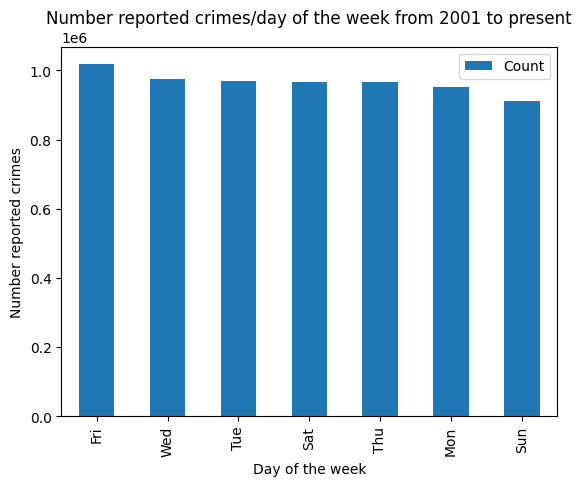

In [143]:
cp.sort_values('Count',ascending=False).plot(kind='bar', x='Day_of_Week', y= 'Count')
plt.xlabel('Day of the week')
plt.ylabel('Number reported crimes')
plt. title('Number reported crimes/day of the week from 2001 to present')

## RDDs

In [146]:
data2rdd = sc.textFile('police-station.csv')
data2rdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [147]:
data2_header = data2rdd.first()

In [149]:
data2_rest = data2rdd.filter(lambda line: line!= data2_header)
data2_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

In [151]:
#how many police stations are there?
data2_rest.map(lambda line: line.split(',')).collect()

[['Headquarters',
  'Headquarters',
  '3510 S Michigan Ave',
  'Chicago',
  'IL',
  '60653',
  'http://home.chicagopolice.org',
  '',
  '',
  '',
  '1177731.401',
  '1881697.404',
  '41.83070169',
  '-87.62339535',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['18',
  'Near North',
  '1160 N Larrabee St',
  'Chicago',
  'IL',
  '60610',
  'http://home.chicagopolice.org/community/districts/18th-district-near-north/',
  '312-742-5870',
  '312-742-5771',
  '312-742-5773',
  '1172080.029',
  '1908086.527',
  '41.90324165',
  '-87.64335214',
  '"(41.9032416531',
  ' -87.6433521393)"'],
 ['19',
  'Town Hall',
  '850 W Addison St',
  'Chicago',
  'IL',
  '60613',
  'http://home.chicagopolice.org/community/districts/19th-district-town-hall/',
  '312-744-8320',
  '312-744-4481',
  '312-744-8011',
  '1169730.744',
  '1924160.317',
  '41.94740046',
  '-87.65151202',
  '"(41.9474004564',
  ' -87.651512018)"'],
 ['20',
  'Lincoln',
  '5400 N Lincoln Ave',
  'Chicago',
  'IL',
  '60625',
  'http://

In [152]:
data2_rest.map(lambda line: line.split(',')).count()

24

In [153]:
data2.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [159]:
#display district-Zip WITH id 7

(data2_rest.filter(lambda line: line.split(',')[0] == '7').
  map(lambda line: (line.split(',')[0],
                   line.split(',')[1],
                   line.split(',')[2],
                   line.split(',')[3],
                   line.split(',')[4],
                   line.split(',')[5],
                   )).collect())


[('7', 'Englewood', '1438 W 63rd St', 'Chicago', 'IL', '60636')]

In [160]:
#police station 10 and 11 are geograph close to each other. display the district ID, District name, address and zip code

(data2_rest.filter(lambda line: line.split(',')[0] in ['10','11']).
  map(lambda line : (line.split(',')[1],
                     line.split(',')[2],
                     line.split(',')[5]
                     )).collect())

[('Ogden', '3315 W Ogden Ave', '60623'),
 ('Harrison', '3151 W Harrison St', '60612')]